# Importing Libraries 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
sns.set()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Reading csv file 

In [5]:
data = pd.read_csv("udemy_output_All_Finance__Accounting_p1_p626.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [7]:
data.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,1.360800e+04,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,12205.000000,13111.000000
mean,1.681721e+06,2847.010435,3.923293,3.912242,3.912242,243.169827,32.224794,0.110523,493.943794,4646.992602
std,9.539271e+05,9437.865634,1.031304,1.039237,1.039237,1580.965895,42.766911,0.623501,267.827260,3109.101019
min,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,455.000000,1280.000000
25%,8.580862e+05,62.000000,3.800000,3.787315,3.787315,7.000000,12.000000,0.000000,455.000000,1600.000000
50%,1.623421e+06,533.000000,4.194440,4.181735,4.181735,24.000000,21.000000,0.000000,455.000000,3200.000000
75%,2.503720e+06,2279.500000,4.450000,4.452105,4.452105,87.000000,37.000000,0.000000,455.000000,8640.000000
max,3.486006e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


## Checking null values 
We find 1403 null vlues in (discount_price__amount | discount_price__currency | discount_price__price_string)
and 497 null values in (price_detail__amount | price_detail__currency | price_detail__price_string)

In [8]:
data.isnull().sum()

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
discount_price__currency        1403
discount_price__price_string    1403
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
dtype: int64

### Using missing values' matrix to visualize attributes which have null values 

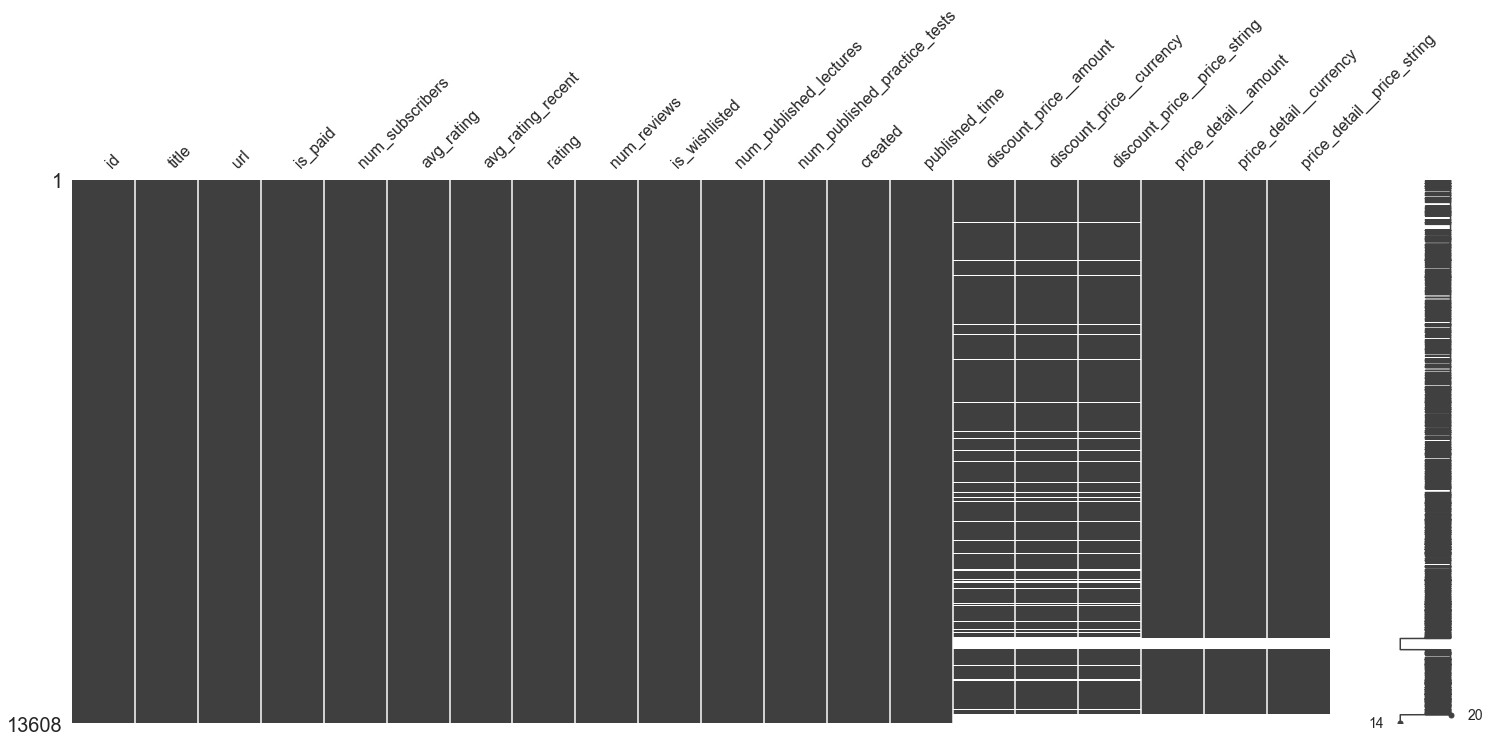

In [9]:
msno.matrix(data)
plt.show()

### calculating rate of null values 

In [10]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate}%")

discount_price__amount's null rate : 10.310111699000588%
discount_price__currency's null rate : 10.310111699000588%
discount_price__price_string's null rate : 10.310111699000588%
price_detail__amount's null rate : 3.652263374485597%
price_detail__currency's null rate : 3.652263374485597%
price_detail__price_string's null rate : 3.652263374485597%


### The following block of code calculating title of courses according it's rating 

In [11]:
rating_5 = []
rating_4 = []
rating_3 = []
rating_2 = []
rating_1 = []
rating_0 = []
for i in range(0, len(data.rating.values)-1):
    if data.rating.values[i] == 5.0:
        rating_5.append(data.title.values[i])
    if 4.0 <= data.rating.values[i] < 5.0:
        rating_4.append(data.title.values[i])
    if 3.0 <= data.rating.values[i] < 4.0:
        rating_3.append(data.values[i])
    if 2.0 <= data.rating.values[i] < 3.0:
        rating_2.append(data.values[i])
    if 1.0 <= data.rating.values[i] < 2.0:
        rating_1.append(data.title.values[i])
    if 0.0 <= data.rating.values[i] < 1.0:
        rating_0.append(data.title.values[i])

### Using seaborn libraries we visualize courses rating 

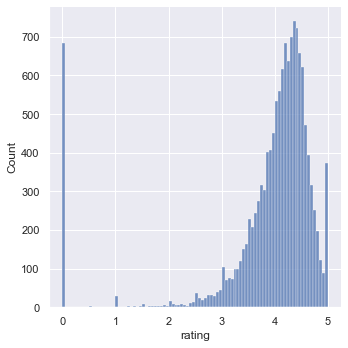

In [12]:
sns.displot(data['rating'])

We find that the hights courses rating in 4 stars then we notice there are normal distribution from 3 stars to 5 stars 

### Using word cloud library to find title of Courses which is repeated alot of times

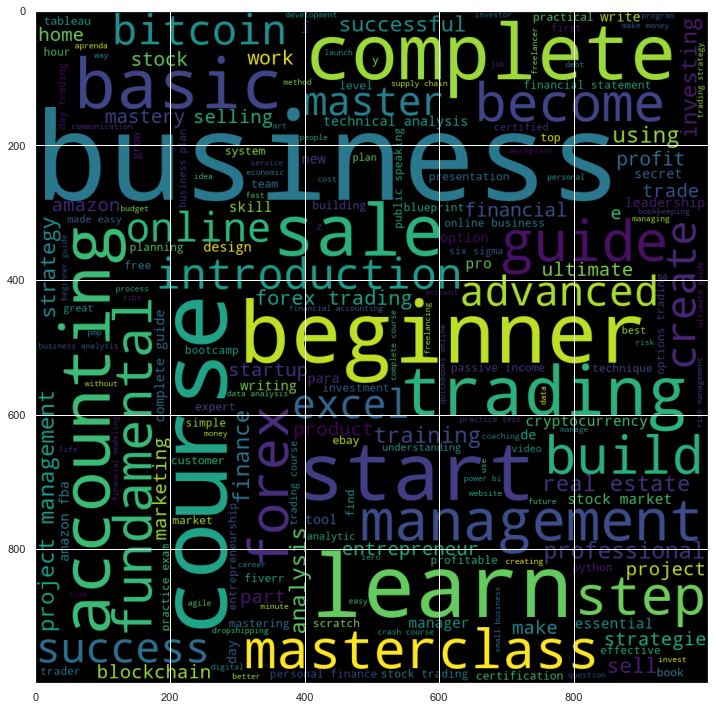

In [13]:
titleWords = ""
stopwords = set(STOPWORDS) 
titles = data["title"]
  
for title in titles: 
    tokens = title.split() 
    length = len(tokens)
    for i in range(0, length): 
        tokens[i] = tokens[i].lower() 
      
    titleWords += " ".join(tokens) + " "

cloud = WordCloud(width= 1000 , height=1000,
                 stopwords = stopwords, 
                 min_font_size= 12).generate(titleWords)
plt.figure(figsize=(10,10), facecolor= None)
plt.imshow(cloud)
plt.tight_layout(pad = 1) 
plt.show()

We find (business - beginner - complete) are the most course title which repeated // so udemy should improve itself using business courses , beginner courses  

In [14]:
dataset = data.rename(columns={'price_detail__amount': 'price'})

### Using seaborn liabrary we made a plot for Course price 

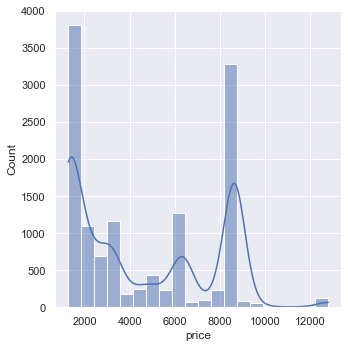

In [15]:
sns.displot(dataset['price'], kde=True)
plt.show()

this visaulization shows us 8000 and 2000 is a highest values for courses 

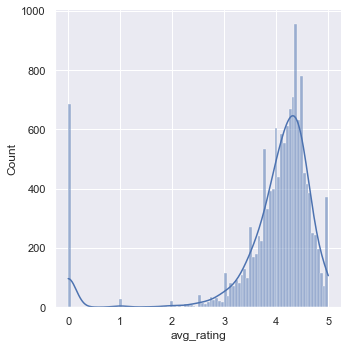

In [16]:
sns.displot(dataset['avg_rating'], kde=True)
plt.show()

This plot shows us count of avg rating

Result of avg rating plot tell us that higthest avg rating in 4 stars 

In [17]:
data[['num_subscribers', 'avg_rating', 'num_reviews', 'num_published_lectures', 'price_detail__amount']].corr()

,num_subscribers,avg_rating,num_reviews,num_published_lectures,price_detail__amount
num_subscribers,1.000000,0.082100,0.784190,0.211672,0.147523
avg_rating,0.082100,1.000000,0.068631,0.116836,0.127636
num_reviews,0.784190,0.068631,1.000000,0.179063,0.100738
num_published_lectures,0.211672,0.116836,0.179063,1.000000,0.271904
price_detail__amount,0.147523,0.127636,0.100738,0.271904,1.000000


After making showing correlation among 'num_subscribers', 'avg_rating', 'num_reviews', 'num_published_lectures', 'price_detail__amount' we find , there are higthest correlation between number of reviews and number of subscribers and lowest correlation between number of reviews and avg rating

### Scatter plot for number of subscribers and number of reviews which have the highest correlation 

Using Seaborn Liabrary

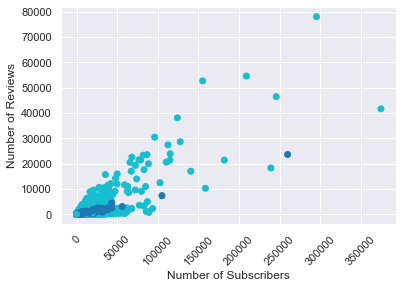

In [18]:
plt.scatter(dataset['num_subscribers'], dataset['num_reviews'],
            c=dataset['is_paid'].astype('category').cat.codes, cmap='tab10')
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

In [19]:
data['created_year'] = data['created'].apply(lambda x: np.int(x[0:4]))
data['published_year'] = data['published_time'].apply(lambda x: np.int(x[0:4]))
data

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_year,published_year
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,...,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2016
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,...,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2016,2016
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,...,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2017,2017
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,...,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2015,2016
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,...,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640",2015,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,3005408,מושגים בסיסיים באופציות חלק ב,/course/1-ndgzhu/,False,47,0.00000,0.00000,0.00000,0,False,...,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020
13604,3467284,Programa de Integridade,/course/iaudit_programa_de_integridade/,False,19,0.00000,0.00000,0.00000,0,False,...,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,/course/goodwill-and-method-of-calculating-goo...,False,47,0.00000,0.00000,0.00000,0,False,...,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020
13606,3211345,Poderoso Investidor,/course/poderoso-investidor/,False,48,0.00000,0.00000,0.00000,0,False,...,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020


### Using Seaborn liabrary 

#### We count number of courses which published from 2010 to 2020

We find 2020 & 2018 have the highest number of published courses , we find a drop in 2019  

Text(0.5, 1.0, 'Number of Course all over the year')

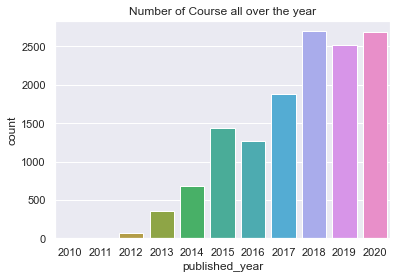

In [20]:
sns.countplot(x= "published_year", data= data).set_title('Number of Course all over the year')